###  

# Mushroom Dataset - Random Forest Decision Tree Model

> dataset source = https://archive.ics.uci.edu/ml/datasets/Mushroom

> decision tree - https://gust.dev/python/model-interpretability
> #### https://github.com/RiccardoAncarani/mushrooms-machine-learning

> #### https://medium.com/@artkulakov/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1

> #### https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

> #### https://blogs.oracle.com/datascience/an-introduction-to-building-a-classification-model-using-random-forests-in-python

## Load Python Packages

In [114]:
# LOAD REQUIRED PYTHON PACKAGES

# Let's load the packages
import numpy as np
import pandas as pd
from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

display('Packages Loaded on: ' + datetime.now().strftime("%Y-%m-%d @ %H:%M")) 

'Packages Loaded on: 2020-08-14 @ 12:59'

## Load Data

In [115]:
#- Set source file directory and path
## raw data set = agaricus-lepiota.data


default_path= '/Users/james.homolak@ibm.com/Desktop/mushroom/data/'
#display('Default Directory: ' + default_path)
source_path= input("Source File Path [Enter For Default]: ") or default_path
#display('Default Path Selected. ' + source_path)

source_name= input("Enter Source File Name: ")
file_path_name= source_path + source_name

display('Selected Filename and Path: '+ file_path_name)

Source File Path [Enter For Default]: 
Enter Source File Name: agaricus-lepiota.data


'Selected Filename and Path: /Users/james.homolak@ibm.com/Desktop/mushroom/data/agaricus-lepiota.data'

In [116]:
#- Load data into dataframe df_shrooms
df_shrooms = pd.read_csv(file_path_name, sep=',', header=None)

#- Add column names to df_shrooms
col_names= ('Class','CapShape','CapSurface','CapColor','Bruises','Odor','GillAttachment','GillSpacing','GillSize','GillColor','StalkShape','StalkRoot','StalkSurfaceAboveRing','StalkSurfaceBelowRing','StalkColorAboveRing','StalkColorBelowRing','VeilType','VeilColor','RingNumber','RingType','SporePrintColor','Population','Habitat')
df_shrooms.columns= col_names

df_shrooms.head()

Class CapShape CapSurface CapColor Bruises Odor GillAttachment GillSpacing  \
0     p        x          s        n       t    p              f           c   
1     e        x          s        y       t    a              f           c   
2     e        b          s        w       t    l              f           c   
3     p        x          y        w       t    p              f           c   
4     e        x          s        g       f    n              f           w   

  GillSize GillColor  ... StalkSurfaceBelowRing StalkColorAboveRing  \
0        n         k  ...                     s                   w   
1        b         k  ...                     s                   w   
2        b         n  ...                     s                   w   
3        n         n  ...                     s                   w   
4        b         k  ...                     s                   w   

  StalkColorBelowRing VeilType VeilColor RingNumber RingType SporePrintColor  \
0                   w        p         w          o        p               k   
1                   w        p         w          o        p               n   
2                   w        p         w          o        p               n   
3                   w        p         w          o        p               k   
4                   w        p         w          o        e               n   

  Population Habitat  
0          s       u  
1          n       g  
2          n       m  
3          s       u  
4          a       g  

[5 rows x 23 columns]

In [117]:
### Mushroom Metadata

#### Column and value code descriptions


#### 1. class:                    edible, poison
#### 2. cap-shape:                bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s"																												
#### 3. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s"																													
#### 4. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y"																									
#### 5. bruises:                 bruises=t,no=f"																									
#### 6. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s"																														
#### 7. gill-attachment:          attached=a,descending=d,free=f,notched=n"																													
#### 8. gill-spacing:             close=c,crowded=w,distant=d"																													
#### 9. gill-size:                broad=b,narrow=n"																													
#### 10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y"																				
#### 11. stalk-shape:              enlarging=e,tapering=t"																												
#### 12. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?"	
#### 13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s"
#### 14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s"																													
#### 15. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y"																														
#### 16. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y"																														
#### 17. veil-type:                partial=p,universal=u"																													
#### 18. veil-color:               brown=n,orange=o,white=w,yellow=y"																														
#### 19. ring-number:              none=n,one=o,two=t"																													
#### 20. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z"																														
#### 21. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y"																														
#### 22. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y"																													
#### 23. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d"



## Dataset EDA

In [118]:
# basic review

display(df_shrooms.shape)
display(df_shrooms.dtypes)



(8124, 23)

Class                    object
CapShape                 object
CapSurface               object
CapColor                 object
Bruises                  object
Odor                     object
GillAttachment           object
GillSpacing              object
GillSize                 object
GillColor                object
StalkShape               object
StalkRoot                object
StalkSurfaceAboveRing    object
StalkSurfaceBelowRing    object
StalkColorAboveRing      object
StalkColorBelowRing      object
VeilType                 object
VeilColor                object
RingNumber               object
RingType                 object
SporePrintColor          object
Population               object
Habitat                  object
dtype: object

In [119]:
# Frequency distibutions and percents for each dataframe column

colnames=df_shrooms.columns

for col in colnames:
    display('------------------------------------')
    display(col)
    display(pd.concat([df_shrooms[col].value_counts(),df_shrooms[col].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage')))
    display()


'------------------------------------'

'Class'

counts  percentage
e    4208   51.797144
p    3916   48.202856

'------------------------------------'

'CapShape'

counts  percentage
x    3656   45.002462
f    3152   38.798621
k     828   10.192024
b     452    5.563762
s      32    0.393895
c       4    0.049237

'------------------------------------'

'CapSurface'

counts  percentage
y    3244   39.931068
s    2556   31.462334
f    2320   28.557361
g       4    0.049237

'------------------------------------'

'CapColor'

counts  percentage
n    2284   28.114229
g    1840   22.648941
e    1500   18.463811
y    1072   13.195470
w    1040   12.801576
b     168    2.067947
p     144    1.772526
c      44    0.541605
u      16    0.196947
r      16    0.196947

'------------------------------------'

'Bruises'

counts  percentage
f    4748   58.444116
t    3376   41.555884

'------------------------------------'

'Odor'

counts  percentage
n    3528   43.426883
f    2160   26.587888
s     576    7.090103
y     576    7.090103
a     400    4.923683
l     400    4.923683
p     256    3.151157
c     192    2.363368
m      36    0.443131

'------------------------------------'

'GillAttachment'

counts  percentage
f    7914   97.415066
a     210    2.584934

'------------------------------------'

'GillSpacing'

counts  percentage
c    6812    83.85032
w    1312    16.14968

'------------------------------------'

'GillSize'

counts  percentage
b    5612   69.079271
n    2512   30.920729

'------------------------------------'

'GillColor'

counts  percentage
b    1728   21.270310
p    1492   18.365337
w    1202   14.795667
n    1048   12.900049
g     752    9.256524
h     732    9.010340
u     492    6.056130
k     408    5.022157
e      96    1.181684
y      86    1.058592
o      64    0.787789
r      24    0.295421

'------------------------------------'

'StalkShape'

counts  percentage
t    4608   56.720827
e    3516   43.279173

'------------------------------------'

'StalkRoot'

counts  percentage
b    3776   46.479567
?    2480   30.526834
e    1120   13.786312
c     556    6.843919
r     192    2.363368

'------------------------------------'

'StalkSurfaceAboveRing'

counts  percentage
s    5176   63.712457
k    2372   29.197440
f     552    6.794682
y      24    0.295421

'------------------------------------'

'StalkSurfaceBelowRing'

counts  percentage
s    4936   60.758247
k    2304   28.360414
f     600    7.385524
y     284    3.495815

'------------------------------------'

'StalkColorAboveRing'

counts  percentage
w    4464   54.948301
p    1872   23.042836
g     576    7.090103
n     448    5.514525
b     432    5.317578
o     192    2.363368
e      96    1.181684
c      36    0.443131
y       8    0.098474

'------------------------------------'

'StalkColorBelowRing'

counts  percentage
w    4384   53.963565
p    1872   23.042836
g     576    7.090103
n     512    6.302314
b     432    5.317578
o     192    2.363368
e      96    1.181684
c      36    0.443131
y      24    0.295421

'------------------------------------'

'VeilType'

counts  percentage
p    8124       100.0

'------------------------------------'

'VeilColor'

counts  percentage
w    7924   97.538159
o      96    1.181684
n      96    1.181684
y       8    0.098474

'------------------------------------'

'RingNumber'

counts  percentage
o    7488   92.171344
t     600    7.385524
n      36    0.443131

'------------------------------------'

'RingType'

counts  percentage
p    3968   48.842935
e    2776   34.170359
l    1296   15.952733
f      48    0.590842
n      36    0.443131

'------------------------------------'

'SporePrintColor'

counts  percentage
w    2388   29.394387
n    1968   24.224520
k    1872   23.042836
h    1632   20.088626
r      72    0.886263
b      48    0.590842
u      48    0.590842
o      48    0.590842
y      48    0.590842

'------------------------------------'

'Population'

counts  percentage
v    4040   49.729197
y    1712   21.073363
s    1248   15.361891
n     400    4.923683
a     384    4.726736
c     340    4.185130

'------------------------------------'

'Habitat'

counts  percentage
d    3148   38.749385
g    2148   26.440177
p    1144   14.081733
l     832   10.241260
u     368    4.529788
m     292    3.594289
w     192    2.363368

In [120]:
# check for column cardinality

display([df_shrooms[x].unique().shape[0] for x in df_shrooms.columns])

# df_shrooms.nunique().sort_values(ascending=False)

for feature in df_shrooms.columns:
    uniq = np.unique(df_shrooms[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))




[2, 6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]

Class: 2 distinct values -  ['e' 'p']
CapShape: 6 distinct values -  ['b' 'c' 'f' 'k' 's' 'x']
CapSurface: 4 distinct values -  ['f' 'g' 's' 'y']
CapColor: 10 distinct values -  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
Bruises: 2 distinct values -  ['f' 't']
Odor: 9 distinct values -  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
GillAttachment: 2 distinct values -  ['a' 'f']
GillSpacing: 2 distinct values -  ['c' 'w']
GillSize: 2 distinct values -  ['b' 'n']
GillColor: 12 distinct values -  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
StalkShape: 2 distinct values -  ['e' 't']
StalkRoot: 5 distinct values -  ['?' 'b' 'c' 'e' 'r']
StalkSurfaceAboveRing: 4 distinct values -  ['f' 'k' 's' 'y']
StalkSurfaceBelowRing: 4 distinct values -  ['f' 'k' 's' 'y']
StalkColorAboveRing: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
StalkColorBelowRing: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
VeilType: 1 distinct values -  ['p']
VeilColor: 4 distinct values -  ['n' 'o' '

In [121]:
# Clean data- remove meaningless column

df_shrooms_clean= df_shrooms.copy()

# column veil_type has only one value therfore no meaning to the model
df_shrooms_clean=df_shrooms_clean.drop(["VeilType"],axis=1)
display("Column VeilType has been removed")

# Note: column StalkRoot has ? as a value 2480 time and is 30.5% of the distribution
# df_shrooms_clean = df_shrooms_clean[df_shrooms_clean['StalkRoot'] != '?'] 
# display("Rows with Stalkroot= ? have been removed")

# review new dataframe shape
display(df_shrooms_clean.shape)
df_shrooms_clean.describe(include = 'object').T 

'Column VeilType has been removed'

(8124, 22)

count unique top  freq
Class                  8124      2   e  4208
CapShape               8124      6   x  3656
CapSurface             8124      4   y  3244
CapColor               8124     10   n  2284
Bruises                8124      2   f  4748
Odor                   8124      9   n  3528
GillAttachment         8124      2   f  7914
GillSpacing            8124      2   c  6812
GillSize               8124      2   b  5612
GillColor              8124     12   b  1728
StalkShape             8124      2   t  4608
StalkRoot              8124      5   b  3776
StalkSurfaceAboveRing  8124      4   s  5176
StalkSurfaceBelowRing  8124      4   s  4936
StalkColorAboveRing    8124      9   w  4464
StalkColorBelowRing    8124      9   w  4384
VeilColor              8124      4   w  7924
RingNumber             8124      3   o  7488
RingType               8124      5   p  3968
SporePrintColor        8124      9   w  2388
Population             8124      6   v  4040
Habitat                8124      7   d  3148

In [122]:
# Create Target and Features dataframes

# Target
target = 'Class' 
labels = df_shrooms[target]

# Remove the target class from the dataset
features = df_shrooms.drop(target, axis=1) 

display(labels.head(), display(features.head()))

CapShape CapSurface CapColor Bruises Odor GillAttachment GillSpacing  \
0        x          s        n       t    p              f           c   
1        x          s        y       t    a              f           c   
2        b          s        w       t    l              f           c   
3        x          y        w       t    p              f           c   
4        x          s        g       f    n              f           w   

  GillSize GillColor StalkShape  ... StalkSurfaceBelowRing  \
0        n         k          e  ...                     s   
1        b         k          e  ...                     s   
2        b         n          e  ...                     s   
3        n         n          e  ...                     s   
4        b         k          t  ...                     s   

  StalkColorAboveRing StalkColorBelowRing VeilType VeilColor RingNumber  \
0                   w                   w        p         w          o   
1                   w                   w        p         w          o   
2                   w                   w        p         w          o   
3                   w                   w        p         w          o   
4                   w                   w        p         w          o   

  RingType SporePrintColor Population Habitat  
0        p               k          s       u  
1        p               n          n       g  
2        p               n          n       m  
3        p               k          s       u  
4        e               n          a       g  

[5 rows x 22 columns]

0    p
1    e
2    e
3    p
4    e
Name: Class, dtype: object

None

In [123]:
# Encode Categorical Columns using features.columns
categorical = features.columns 

# Convert every categorical feature with one hot encoding
features = pd.concat([features, pd.get_dummies(features[categorical])], axis=1) 

# Drop the original feature, leave only the encoded ones
features.drop(categorical, axis=1, inplace=True) 

# Encode the target class, 1 is deadly 0 is safe
labels = pd.get_dummies(labels)['p'] 


# Review dataframe
display(labels.head(), display(features.head()))

CapShape_b  CapShape_c  CapShape_f  CapShape_k  CapShape_s  CapShape_x  \
0           0           0           0           0           0           1   
1           0           0           0           0           0           1   
2           1           0           0           0           0           0   
3           0           0           0           0           0           1   
4           0           0           0           0           0           1   

   CapSurface_f  CapSurface_g  CapSurface_s  CapSurface_y  ...  Population_s  \
0             0             0             1             0  ...             1   
1             0             0             1             0  ...             0   
2             0             0             1             0  ...             0   
3             0             0             0             1  ...             1   
4             0             0             1             0  ...             0   

   Population_v  Population_y  Habitat_d  Habitat_g  Habitat_l  Habitat_m  \
0             0             0          0          0          0          0   
1             0             0          0          1          0          0   
2             0             0          0          0          0          1   
3             0             0          0          0          0          0   
4             0             0          0          1          0          0   

   Habitat_p  Habitat_u  Habitat_w  
0          0          1          0  
1          0          0          0  
2          0          0          0  
3          0          1          0  
4          0          0          0  

[5 rows x 117 columns]

0    1
1    0
2    0
3    1
4    0
Name: p, dtype: uint8

None

In [124]:
# Split the dataset into training and testing, the 80% of the records are in the trainig set

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, random_state=0)

In [125]:
# Review test / train dataframes

display('X_train',X_train.head(),X_train.shape)
display('y_train',y_train.head(),y_train.shape)
display('X_test', X_test.head(),X_test.shape)
display('y_test', y_test.head(),y_test.shape)

'X_train'

CapShape_b  CapShape_c  CapShape_f  CapShape_k  CapShape_s  CapShape_x  \
7434           0           0           0           1           0           0   
7725           0           0           0           0           0           1   
783            0           0           0           0           0           1   
1928           0           0           1           0           0           0   
7466           0           0           0           1           0           0   

      CapSurface_f  CapSurface_g  CapSurface_s  CapSurface_y  ...  \
7434             0             0             1             0  ...   
7725             1             0             0             0  ...   
783              0             0             1             0  ...   
1928             0             0             1             0  ...   
7466             0             0             0             1  ...   

      Population_s  Population_v  Population_y  Habitat_d  Habitat_g  \
7434             1             0             0          0          1   
7725             0             0             0          0          1   
783              1             0             0          0          0   
1928             1             0             0          0          1   
7466             0             1             0          0          0   

      Habitat_l  Habitat_m  Habitat_p  Habitat_u  Habitat_w  
7434          0          0          0          0          0  
7725          0          0          0          0          0  
783           0          1          0          0          0  
1928          0          0          0          0          0  
7466          1          0          0          0          0  

[5 rows x 117 columns]

(6499, 117)

'y_train'

7434    0
7725    0
783     0
1928    0
7466    1
Name: p, dtype: uint8

(6499,)

'X_test'

CapShape_b  CapShape_c  CapShape_f  CapShape_k  CapShape_s  CapShape_x  \
380            0           0           0           0           0           1   
3641           0           0           1           0           0           0   
273            0           0           0           0           0           1   
1029           0           0           0           0           0           1   
684            0           0           0           0           0           1   

      CapSurface_f  CapSurface_g  CapSurface_s  CapSurface_y  ...  \
380              0             0             0             1  ...   
3641             0             0             0             1  ...   
273              0             0             0             1  ...   
1029             0             0             1             0  ...   
684              1             0             0             0  ...   

      Population_s  Population_v  Population_y  Habitat_d  Habitat_g  \
380              1             0             0          0          0   
3641             0             0             1          1          0   
273              0             0             0          0          0   
1029             0             0             0          0          1   
684              0             1             0          1          0   

      Habitat_l  Habitat_m  Habitat_p  Habitat_u  Habitat_w  
380           0          0          0          1          0  
3641          0          0          0          0          0  
273           0          1          0          0          0  
1029          0          0          0          0          0  
684           0          0          0          0          0  

[5 rows x 117 columns]

(1625, 117)

'y_test'

380     1
3641    0
273     0
1029    0
684     0
Name: p, dtype: uint8

(1625,)

## Modeling - RandomForestClassifier


#### Random Forest

> #### The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random: 
    Random sampling of training data points when building trees
    Random subsets of features considered when splitting nodes



https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [135]:
# RandomForestClassifier - define and fit model
# note an esitmator is a single randomly generated decision tree

ests= 75


rf_tree= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators= ests, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
# Train
rf_tree.fit(X_train, y_train)

display(rf_tree) 
display(f'Model Accuracy: {rf_tree.score(X_train, y_train)}')


RandomForestClassifier(n_estimators=75, n_jobs=1)

'Model Accuracy: 1.0'

[(0.12912736750129825, 'Odor_n'),
 (0.07613595929087386, 'GillSize_n'),
 (0.07576268745607927, 'Odor_f'),
 (0.04776389869599657, 'SporePrintColor_h'),
 (0.046779200747763025, 'GillSize_b'),
 (0.039611142358749726, 'StalkSurfaceAboveRing_k'),
 (0.03659427324199309, 'GillColor_b'),
 (0.03359921010166388, 'RingType_p'),
 (0.02985244096106796, 'StalkSurfaceBelowRing_k'),
 (0.027316585836479692, 'Bruises_f')]

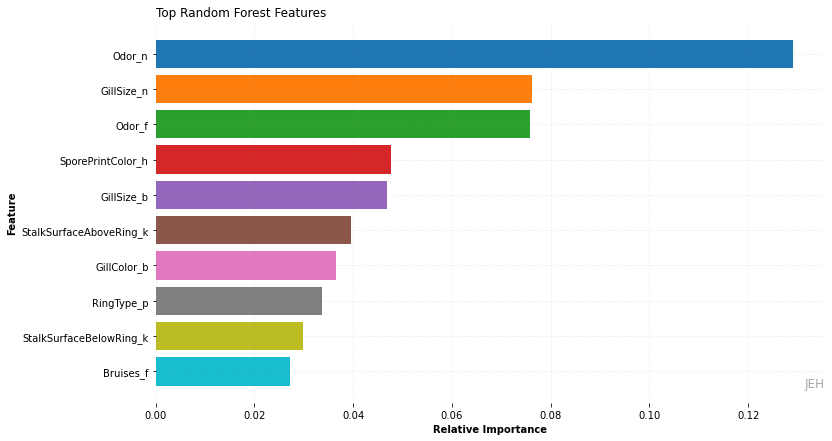

In [136]:
# get topx feature importance
# the impurity decrease from each feature can be averaged and the features are ranked according to this measure. 

importance = rf_tree.feature_importances_
topx=10

# create list of feature and inportance value
z = zip(rf_tree.feature_importances_, X_train.columns)
z_lst= list(sorted(z))
z_lst.sort(reverse = True)
display(z_lst[:topx])


#plot feature importance

# Plot settings
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 7)) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)
    
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values  
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='blue') 

# Add Plot Title 
ax.set_title('Top Random Forest Features', 
             loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15, 'JEH', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 

plt.ylabel('Feature', fontweight ='bold') 
plt.xlabel('Relative Importance', fontweight ='bold') 


for i in range(len(z_lst[:topx])): 
    
    x= z_lst[i][1] 
    y= z_lst[i][0]
    plt.barh(x,y)      


    
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

In [137]:
# RandomForest estimators

rf_tree.estimators_[ests-1]
rf_tree.estimators_[:]

[DecisionTreeClassifier(max_features='auto', random_state=194779854),
 DecisionTreeClassifier(max_features='auto', random_state=256883272),
 DecisionTreeClassifier(max_features='auto', random_state=698825166),
 DecisionTreeClassifier(max_features='auto', random_state=1676560656),
 DecisionTreeClassifier(max_features='auto', random_state=1461179282),
 DecisionTreeClassifier(max_features='auto', random_state=1379430670),
 DecisionTreeClassifier(max_features='auto', random_state=1575417273),
 DecisionTreeClassifier(max_features='auto', random_state=104054701),
 DecisionTreeClassifier(max_features='auto', random_state=158630436),
 DecisionTreeClassifier(max_features='auto', random_state=237236510),
 DecisionTreeClassifier(max_features='auto', random_state=1256718301),
 DecisionTreeClassifier(max_features='auto', random_state=1034687353),
 DecisionTreeClassifier(max_features='auto', random_state=379574489),
 DecisionTreeClassifier(max_features='auto', random_state=1217351703),
 DecisionTree

In [141]:
# Visualize a specific tree in the decision tree forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

tree_num= 24
estimator = rf_tree.estimators_[tree_num]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = df_shrooms['Class'].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=5)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [130]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



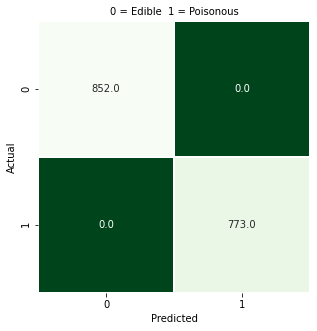

In [131]:
# Confusion matrix

# predict
y_pred = rf_tree.predict(X_test)
y_pred

# create a confusion matrix
cm= confusion_matrix(y_pred, y_test)

# plot cm
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Greens_r', cbar = False);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('0 = Edible  1 = Poisonous', size = 10)
plt.show()



In [132]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result    0    1
Actual Result             
0                 852    0
1                   0  773

https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
https://medium.com/@harshdeepsingh_35448/understanding-random-forests-aa0ccecdbbbb
